## case 1

In [1]:
set.seed(123)
n_sim = 200
n_df = 20
n_sample = 100

prediction_matrix = matrix(NA, nrow = n_sim, ncol = n_sample)
mse_temp = matrix(NA, nrow = n_sim, ncol = n_df)
results = matrix(NA, nrow = 3, ncol = n_df)

In [2]:
# data split
x_train = runif(n_sample, -0.5, 0.5)
f_train = 1.8 * x_train + sin(10 * x_train)
epsilon_train = replicate(n_sim, rnorm(n_sample, 0, sqrt(2)))
y_train = replicate(n_sim, f_train) + epsilon_train

x_test = runif(n_sample, -0.5, 0.5)
f_test = 1.8 * x_test + sin(10 * x_test)

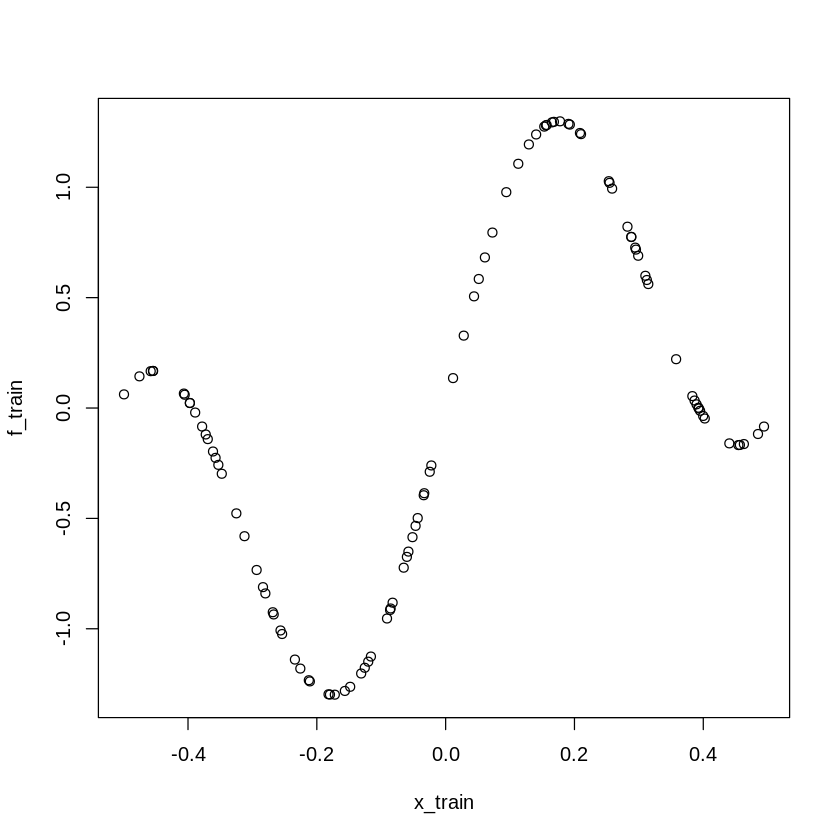

In [3]:
# outer for-loop
for (df_iter in seq(n_df)){
  # inner for-loop
  for(mc_iter in seq(n_sim)){
    cspline = smooth.spline(x_train, y_train[, mc_iter], df = df_iter + 1)
    cspline_predict = predict(cspline, x_test)
    prediction_matrix[mc_iter, 1:n_sample] = cspline_predict$y
    mse_temp[mc_iter, df_iter] = mean((cspline_predict$y - f_test)^2)
  }

  var_matrix = apply(prediction_matrix, 2, FUN = var)
  bias_matrix = apply(prediction_matrix, 2, FUN = mean)

  squared_bias = (bias_matrix - f_test)^2

  results[1, df_iter] = mean(var_matrix)
  results[2, df_iter] = mean(squared_bias)
}
results[3, 1:n_df] = apply(mse_temp, 2, FUN = mean)
plot(x_train, f_train)

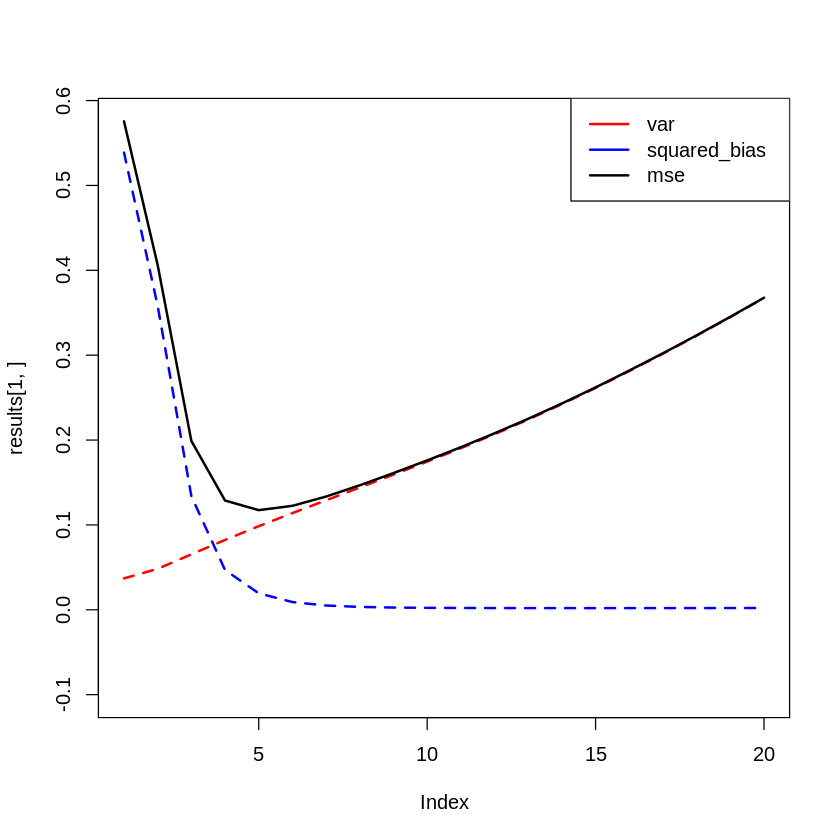

In [4]:
# Bias-Variance Trade off
plot(results[1, ], lty = 2, ylim = c(-0.1, max(results)), type = "l", col = "red", lwd = 2)
lines(results[2, ], lty = 2, col = "blue", lwd = 2)
lines(results[3, ], lwd = 2)
legend("topright", legend = c("var", "squared_bias", "mse"), col = c("red", "blue", "black"),
       lty = 1, lwd = 2)

## case 2 : Curse of Dimensionality

In [5]:
set.seed(123)
n_sim = 200
n_df = 20
n_sample = 15

prediction_matrix = matrix(NA, nrow = n_sim, ncol = n_sample)
mse_temp = matrix(NA, nrow = n_sim, ncol = n_df)
results = matrix(NA, nrow = 3, ncol = n_df)

In [6]:
# data split
x_train = runif(n_sample, -0.5, 0.5)
f_train = 1.8 * x_train + sin(10 * x_train)
epsilon_train = replicate(n_sim, rnorm(n_sample, 0, sqrt(2)))
y_train = replicate(n_sim, f_train) + epsilon_train

x_test = runif(n_sample, -0.5, 0.5)
f_test = 1.8 * x_test + sin(10 * x_test)

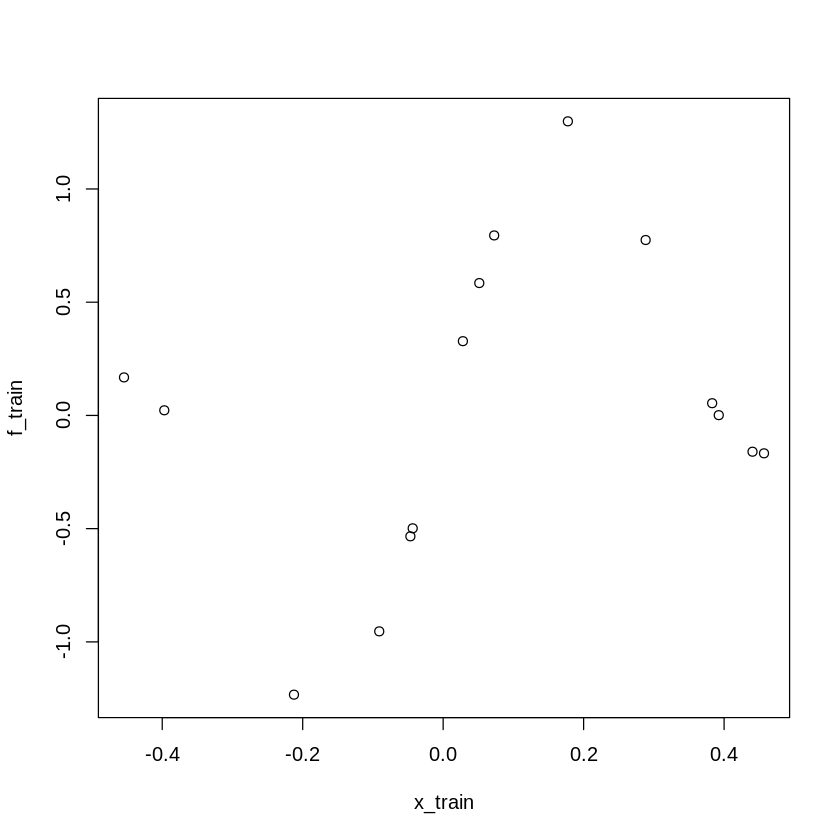

In [7]:
# outer for-loop
suppressWarnings(for (df_iter in seq(n_df)){
  # inner for-loop
  for(mc_iter in seq(n_sim)){
    cspline = smooth.spline(x_train, y_train[, mc_iter], df = df_iter + 1)
    cspline_predict = predict(cspline, x_test)
    prediction_matrix[mc_iter, 1:n_sample] = cspline_predict$y
    mse_temp[mc_iter, df_iter] = mean((cspline_predict$y - f_test)^2)
  }

  var_matrix = apply(prediction_matrix, 2, FUN = var)
  bias_matrix = apply(prediction_matrix, 2, FUN = mean)

  squared_bias = (bias_matrix - f_test)^2

  results[1, df_iter] = mean(var_matrix)
  results[2, df_iter] = mean(squared_bias)
})
results[3, 1:n_df] = apply(mse_temp, 2, FUN = mean)
plot(x_train, f_train)

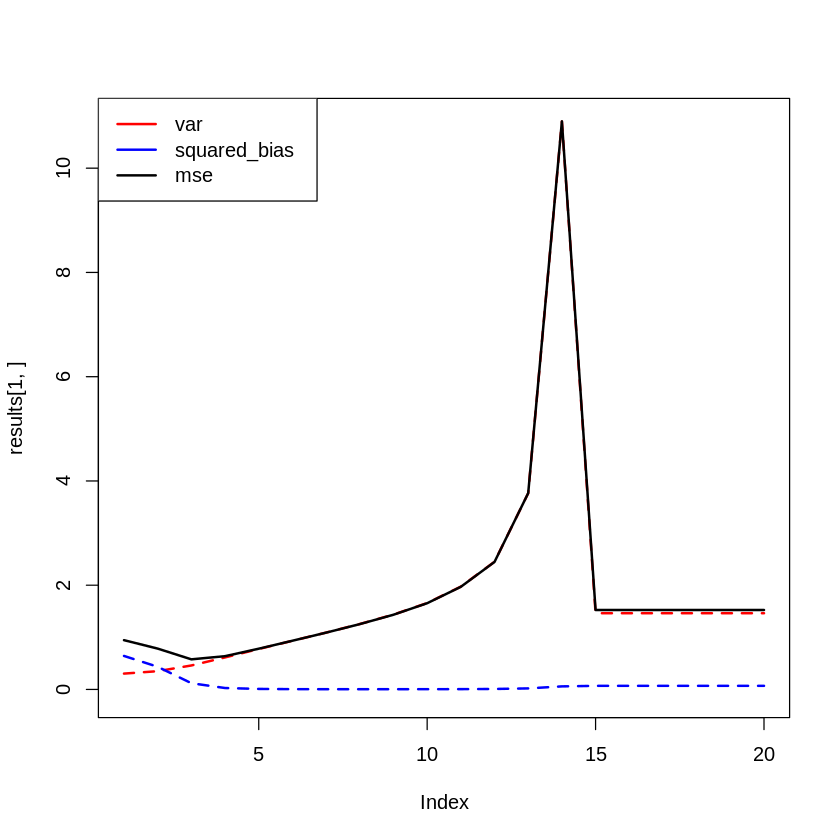

In [8]:
# Bias-Variance Trade off
plot(results[1, ], lty = 2, ylim = c(-0.1, max(results)), type = "l", col = "red", lwd = 2)
lines(results[2, ], lty = 2, col = "blue", lwd = 2)
lines(results[3, ], lwd = 2)
legend("topleft", legend = c("var", "squared_bias", "mse"), col = c("red", "blue", "black"),
       lty = 1, lwd = 2)